# Benchmark Performance of New Loss Module

https://github.com/scikit-learn/scikit-learn/pull/19089

**Table of Contents** <a name="toc"></a>
- [1. LogisticRegression](#chapter_1)
- [2. HistGradientBoostingClassifier](#chapter_2)
  
Benchmark scripts "bench_loss_module_hgbt.py" and "bench_loss_module_logistic.py" are run once on master ([commit 5a63f903ff1d45084c4fd41f241bf5dfdd067680](https://github.com/scikit-learn/scikit-learn/commit/5a63f903ff1d45084c4fd41f241bf5dfdd067680)) and once on the PR. Both master and PR are compiled with `make in` and OpenMP enabled. Number of threads of OpenMP is set with `export OMP_NUM_THREADS=6` (or `export OMP_NUM_THREADS=1`) before running the scripts.

Hardware: Intel Core i7-8559U (4 cores * 2 = 8), 8th generation, 16 GB RAM<br>
Software: Python 3.7.9, numpy 1.19.5, scipy 1.5.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# See https://github.com/mwaskom/seaborn/issues/1986
#g = sns.FacetGrid(df.wall_time.reset_index(), hue="function", height =5)
#g.map(plt.errorbar, "N", "mean", yerr=df.wall_time.reset_index()['std']);

# This works
# See https://stackoverflow.com/a/30428808
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="line", ax=ax, **kwargs)
    

# export OMP_NUM_THREADS=1
df_Logistic_PR_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_1.parquet"
)
df_Logistic_PR_Threads_1["branch"] = "PR"

df_Logistic_MASTER_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_MASTER_Threads_1.parquet"
)
df_Logistic_MASTER_Threads_1["branch"] = "master"


# export OMP_NUM_THREADS=6
df_Logistic_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_6.parquet"
)
df_Logistic_PR_Threads_6["branch"] = "PR"

df_HGBT_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_PR_Threads_6.parquet"
)
df_HGBT_PR_Threads_6["branch"] = "PR"

df_HGBT_MASTER_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_MASTER_Threads_6.parquet"
)
df_HGBT_MASTER_Threads_6["branch"] = "master"

## 1. LogisticRegression <a name="chapter_1"></a>
[back to TOC](#toc)

`n_features = 50`

In [2]:
df = pd.concat([
    df_Logistic_PR_Threads_1, df_Logistic_PR_Threads_6, df_Logistic_MASTER_Threads_1
])
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 1), ["branch"]] = "PR n_threads=1"
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 6), ["branch"]] = "PR n_threads=6"
df = df.set_index(["n_classes", "branch"], append=True)
df.head()

wall_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011542  0.013257  0.000945   
      newton-cg 2         PR n_threads=1  0.008026  0.008417  0.000312   
1000  lbfgs     2         PR n_threads=1  0.007494  0.008172  0.000390   
      newton-cg 2         PR n_threads=1  0.009929  0.010577  0.000383   
10000 lbfgs     2         PR n_threads=1  0.034399  0.035926  0.001660   

                                          cpu_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011662  0.012529  0.000542   
      newton-cg 2         PR n_threads=1  0.008043  0.008882  0.000502   
1000  lbfgs     2         PR n_threads=1  0.007305  0.008235  0.000432   
      newton-cg 2         PR n_threads=1  0.010811  0.017188  0.002314   
10000 lbfgs     2         PR n_threads=1  0.035931  0.062721  0.009489   

                                         peak_memory                      \
                                                mean       max       std   
N     solver    n_classes branch                                           
100   lbfgs     2         PR n_threads=1    0.003516  0.035156  0.011117   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
1000  lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
10000 lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   

                                                   estimator n_threads  
                                                                        
N     solver    n_classes branch                                        
100   lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
1000  lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
10000 lbfgs     2         PR n_threads=1  LogisticRegression         1

Text(0.5, 0.98, 'Logistic Regression: Wall Time')

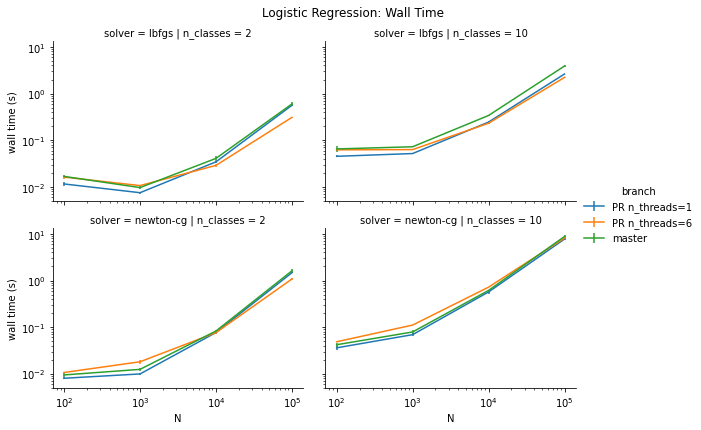

In [3]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: CPU Time')

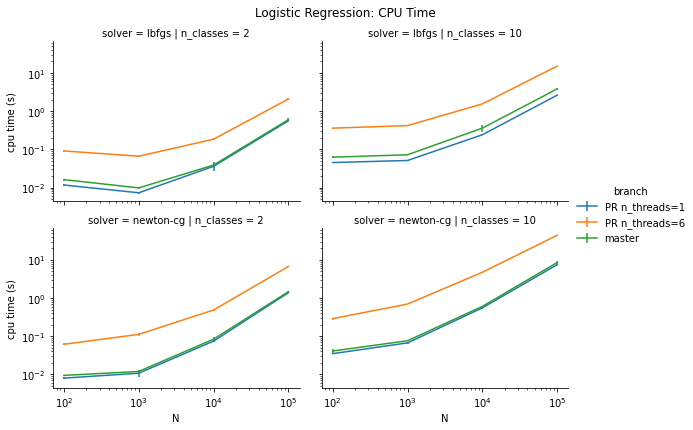

In [4]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: Peak Memory')

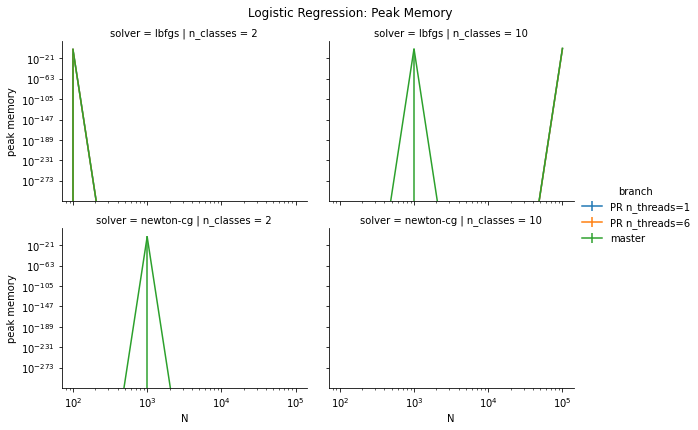

In [5]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Peak Memory", fontsize=12)

Error propagation: $\sigma^2(x/y) \approx \left(\frac{\partial}{\partial x}\frac{x}{y}\right)^2 \sigma_x^2 + \left(\frac{\partial}{\partial y}\frac{x}{y}\right)^2 \sigma_y^2
= \frac{1}{y^2} \sigma_x^2 + \frac{x^2}{y^4} \sigma_y^2 $

In [6]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "solver", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "solver", "n_classes", "branch", "mean", "std"]]
df_plot.head()

,N,solver,n_classes,branch,mean,std
0,100,lbfgs,2,PR n_threads=1,0.688741,0.067066
1,100,lbfgs,2,PR n_threads=6,0.966700,0.090805
2,100,lbfgs,2,master,1.000000,0.074459
3,100,newton-cg,2,PR n_threads=1,0.849085,0.077504
4,100,newton-cg,2,PR n_threads=6,1.128017,0.103934


In [7]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR n_threads=1", 'N'] *= 0.95
df_plot.loc[df_plot["branch"] == "PR n_threads=6", 'N'] *= 1.05

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master')

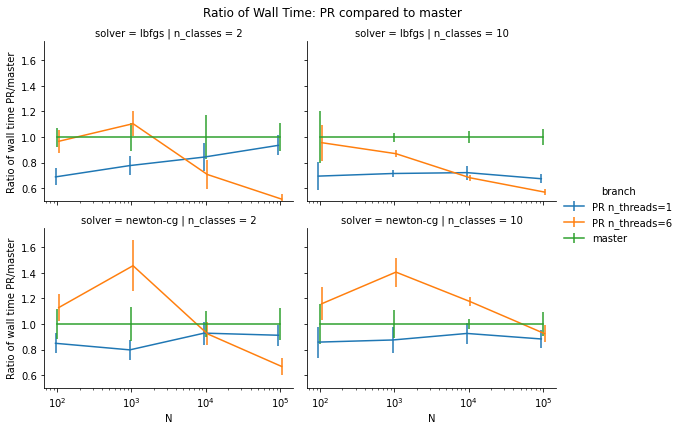

In [8]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.75))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")

## 2. HistGradientBoostingClassifier <a name="chapter_2"></a>
[back to TOC](#toc)

`n_features = 20`

In [9]:
df = pd.concat([df_HGBT_PR_Threads_6, df_HGBT_MASTER_Threads_6])
df = df.set_index(["n_classes", "branch"], append=True)
df

wall_time                       \
                                             mean        max       std   
N      early_stopping n_classes branch                                   
100    False          2         PR       0.052936   0.069803  0.006521   
       True           2         PR       0.052075   0.061984  0.004050   
1000   False          2         PR       0.362893   0.632060  0.075051   
       True           2         PR       0.339028   0.398753  0.027085   
10000  False          2         PR       0.582805   0.725731  0.054856   
       True           2         PR       0.575235   0.678261  0.041310   
100000 False          2         PR       1.423272   1.901077  0.154958   
       True           2         PR       1.369135   1.621335  0.089596   
100    False          10        PR       0.450104   0.666876  0.054638   
       True           10        PR       0.458332   0.568186  0.031512   
1000   False          10        PR       3.280844   3.993435  0.238320   
       True           10        PR       3.274108   3.879461  0.248838   
10000  False          10        PR       5.177399   6.231275  0.362692   
       True           10        PR       5.252541   5.892997  0.333491   
100000 False          10        PR       9.741297  10.617274  0.331518   
       True           10        PR       9.937853  11.392936  0.502821   
100    False          2         master   0.050114   0.063107  0.003565   
       True           2         master   0.051120   0.058626  0.003477   
1000   False          2         master   0.350805   0.437201  0.029903   
       True           2         master   0.346144   0.425081  0.029148   
10000  False          2         master   0.575045   0.642335  0.035298   
       True           2         master   0.582066   0.710366  0.047314   
100000 False          2         master   1.699876   1.991100  0.084981   
       True           2         master   1.705690   1.919464  0.064473   
100    False          10        master   0.478727   0.709930  0.070035   
       True           10        master   0.494300   0.676769  0.054926   
1000   False          10        master   3.345260   3.876697  0.181382   
       True           10        master   3.476441   4.010758  0.240321   
10000  False          10        master   5.346477   6.380007  0.325473   
       True           10        master   5.429615   6.226164  0.392728   
100000 False          10        master  12.976548  13.872131  0.435932   
       True           10        master  13.072434  14.931885  0.751053   

                                         cpu_time                       \
                                             mean        max       std   
N      early_stopping n_classes branch                                   
100    False          2         PR       0.295299   0.357257  0.021830   
       True           2         PR       0.303361   0.328577  0.016475   
1000   False          2         PR       2.070553   2.723844  0.193326   
       True           2         PR       2.021808   2.337397  0.126211   
10000  False          2         PR       3.170439   3.678910  0.180599   
       True           2         PR       3.232263   3.750370  0.199692   
100000 False          2         PR       7.288635   9.243040  0.599527   
       True           2         PR       7.181774   8.653572  0.454844   
100    False          10        PR       2.667539   3.442076  0.277162   
       True           10        PR       2.682050   2.904887  0.139255   
1000   False          10        PR      19.225139  20.687506  0.811513   
       True           10        PR      19.140726  20.766879  0.809037   
10000  False          10        PR      28.867465  31.056111  1.129701   
       True           10        PR      29.150307  32.850885  1.791407   
100000 False          10        PR      53.916894  58.210391  1.730651   
       True           10        PR      54.419799  58.684162  1.660414   
100    False          2         master   0.

Text(0.5, 0.98, 'Histogram Gradient Boosting: Wall Time')

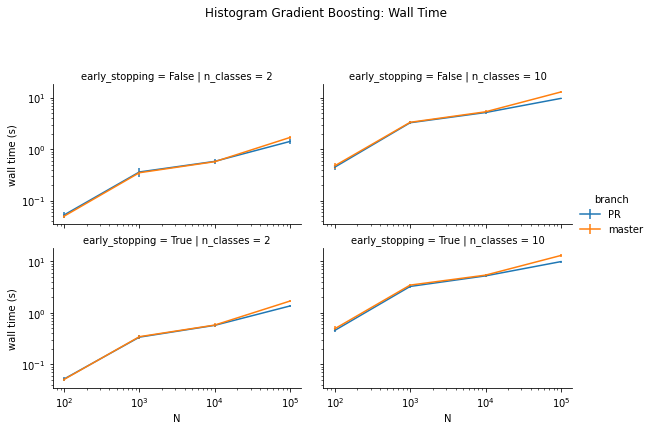

In [10]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: CPU Time')

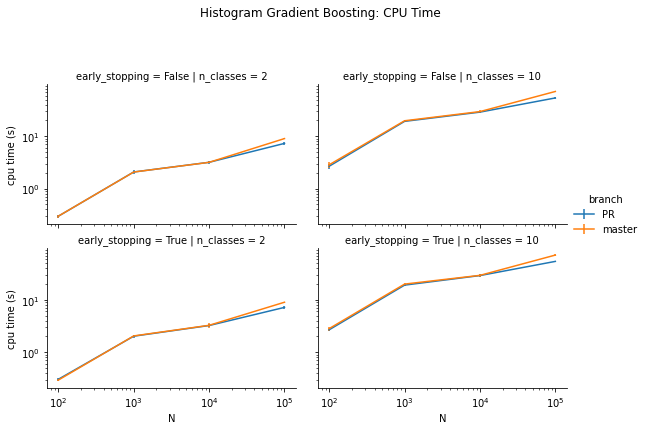

In [11]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: Peak Memory')

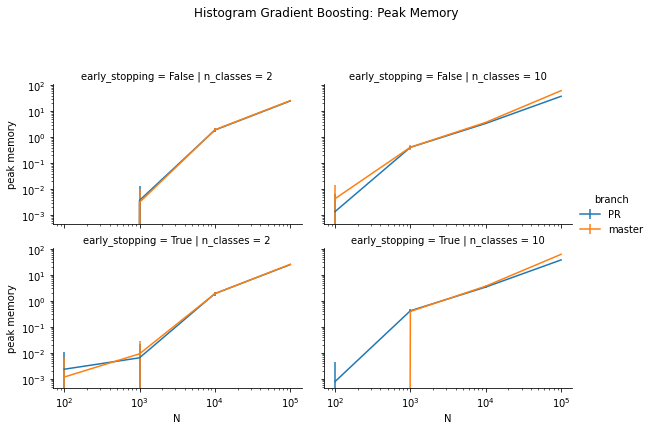

In [12]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Peak Memory", fontsize=12)

In [13]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "n_classes", "early_stopping"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "n_classes", "early_stopping", "branch", "mean", "std"]]
df_plot.head()

,N,n_classes,early_stopping,branch,mean,std
0,100,2,False,PR,1.056312,0.150267
1,100,2,False,master,1.000000,0.100601
2,100,2,True,PR,1.018667,0.105250
3,100,2,True,master,1.000000,0.096193
4,1000,2,False,PR,1.034457,0.231400


In [14]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR", "N"] *= 0.95

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master')

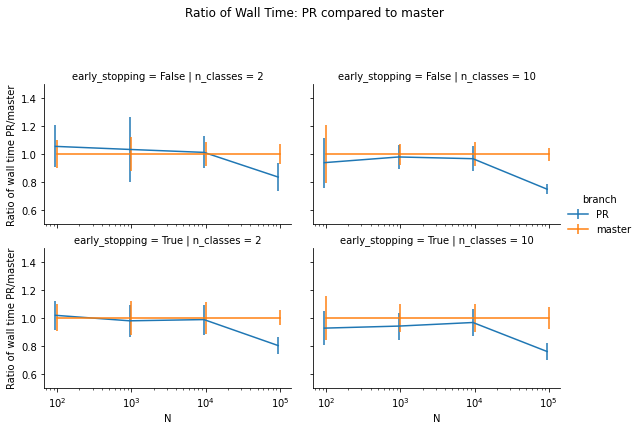

In [15]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.5))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")